# Model Definition and Evaluation
## Table of Contents
1. [Model Selection](#model-selection)
2. [Feature Engineering](#feature-engineering)
3. [Hyperparameter Tuning](#hyperparameter-tuning)
4. [Implementation](#implementation)
5. [Evaluation Metrics](#evaluation-metrics)
6. [Comparative Analysis](#comparative-analysis)


In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
# Import models you're considering
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


## Model Selection

We decided to use a ResNet50 model that has been pretrained on the imagenet dataset.



## Feature Engineering

The features used are identical to those of the baseline model.

In [ ]:
# Load the dataset
# Define the paths to the folders containing the image data
train_data_dir = '../Dataset/cleaned_scaled_split/train/'
validation_data_dir = '../Dataset/cleaned_scaled_split/val/'
test_data_dir = '../Dataset/cleaned_scaled_split/test/'

# Set the parameters for image data generation
batch_size = 64
img_height = 256
img_width = 256
# Load the training data from the folders
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_data_dir,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=64,
    image_size=(256, 256))


# Load the validation data from the folders
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory=validation_data_dir,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=64,
    image_size=(256, 256))

# Load the validation data from the folders
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory=test_data_dir,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=2,
    image_size=(256, 256))

Found 2167 files belonging to 10 classes.
Found 283 files belonging to 10 classes.
Found 289 files belonging to 10 classes.


## Hyperparameter Tuning

We did not do any Hyperparameter Tuning


## Implementation



In [7]:
def preprocess_data(X, Y):
    """trains a convolutional neural network to classify the dataset"""
    X_p = keras.applications.resnet50.preprocess_input(X)
    #Y_p = keras.utils.to_categorical(Y, 10)
    return X_p,Y #Y_p


In [8]:
inputs = keras.Input(shape=(256, 256, 3))

In [9]:
resnet = keras.applications.ResNet50(weights='imagenet',
                                 include_top=False, input_tensor=inputs)

for layer in resnet.layers[:170]:
    layer.trainable = False

model = keras.models.Sequential()
model.add(resnet)
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
model.summary()

### preprocessing the data to what imagenet is trained on. 

(This pre processing was not applied for the current best model)

In [11]:
def dataprocessing(dataset,listX,listy):
    for X, y in dataset:
        xtemp, ytemp = preprocess_data(X, y)
        if len(listX) == 0:
            listX = xtemp
            listy = ytemp
        else:
            listX = np.concatenate((listX, xtemp))
            listy = np.concatenate((listy, ytemp))
    return listX, listy 

In [12]:
trainX_list, trainy_list = dataprocessing(train_ds,np.array([]), np.array([]))
valX_list, valy_list = dataprocessing(validation_ds,np.array([]), np.array([]))
testX_list, testy_list =  dataprocessing(test_ds,np.array([]), np.array([]))

### training the model

In [14]:
model.fit(trainX_list, trainy_list, batch_size=64, epochs=10,
          validation_data=(valX_list, valy_list), shuffle=True)

In [15]:
model.save('Res50_no_resize_tvt_split_01.keras')

### load the model cehckpoint to evaluate it

In [16]:
model = tf.keras.models.load_model('Res50_no_resize_tvt_split.keras')

In [17]:
class_correct = [0]*10
class_counters = [0]*10

for batch in test_ds:
    image, labels = preprocess_data(batch[0], batch[1])
    predictions = model.predict(image)
    y_pred_classes = np.argmax(predictions, axis=1)
    for i in range(10):
        class_correct[i] += np.sum(y_pred_classes[labels==i] == i)
        class_counters[i] += np.sum(labels==i)

calss_accuracy = [class_correct[i]/class_counters[i] for i in range(10)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [18]:
try:
    model.summary()
except NameError:
    model = tf.keras.models.load_model('Res50_no_resize_tvt_split.keras')	
predicted = np.array([])
class_correct = [0]*10
class_counters = [0]*10

true_labels = testy_list
predictions = model.predict(testX_list)
y_pred_classes = np.argmax(predictions, axis=1)
predicted = np.concatenate((predicted,y_pred_classes)) 
print(np.mean(y_pred_classes==true_labels))
for i in range(10):
    class_correct[i] += np.sum(y_pred_classes[true_labels==i] == i)
    class_counters[i] += np.sum(true_labels==i)

conf_mat = confusion_matrix(true_labels, predicted,normalize='true')
calss_accuracy = [class_correct[i]/class_counters[i] for i in range(10)]

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 8, 8, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,416,160 (104.58 MB)

 Trainable params: 1,626,058 (6.20 MB)

 Non-trainable params: 22,537,984 (85.98 MB)

 Optimizer params: 3,252,118 (12.41 MB)

10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step
0.8823529411764706


In [19]:
import os

train_dir = '../Dataset/train_cleaned_scaled/train/'

datadirs = os.listdir(train_dir)
print(datadirs)

['Aphid', 'Black Rust', 'Brown Rust', 'Healthy', 'Mildew', 'Septoria', 'Smut', 'Stem fly', 'Tan spot', 'Yellow Rust']


## Evaluation Metrics

We evalute our model on the accuracy per class and also take a look at the confusion matrix to see how the model does specifically on the different classes.


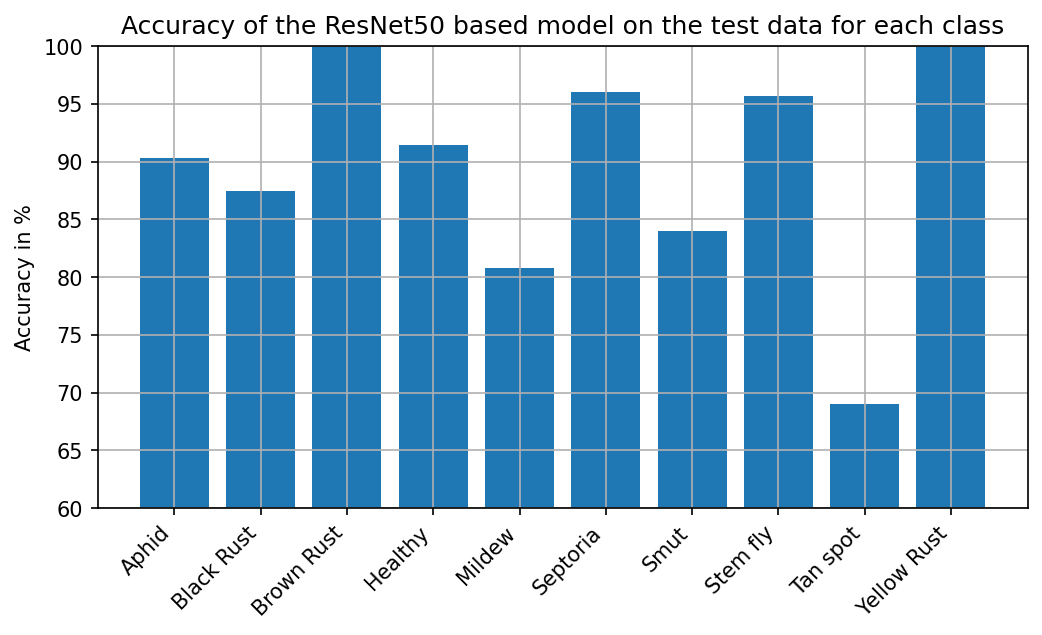

In [20]:
import matplotlib.pyplot as plt

# Define the class labels
class_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Plot the bar chart
plt.figure(figsize=(8, 4), dpi=150)
plt.grid()
plt.bar(class_labels, np.asarray(calss_accuracy)*100)

# Add labels and title
#plt.xlabel('Class')
plt.ylabel('Accuracy in %')
plt.title('Accuracy of the ResNet50 based model on the test data for each class')

plt.ylim(60, 100)
plt.xticks(class_labels,datadirs, rotation=45, ha='right')
# Show the plot
plt.show()

[Text(0, 0, 'Aphid'),
 Text(0, 1, 'Black Rust'),
 Text(0, 2, 'Brown Rust'),
 Text(0, 3, 'Healthy'),
 Text(0, 4, 'Mildew'),
 Text(0, 5, 'Septoria'),
 Text(0, 6, 'Smut'),
 Text(0, 7, 'Stem fly'),
 Text(0, 8, 'Tan spot'),
 Text(0, 9, 'Yellow Rust')]

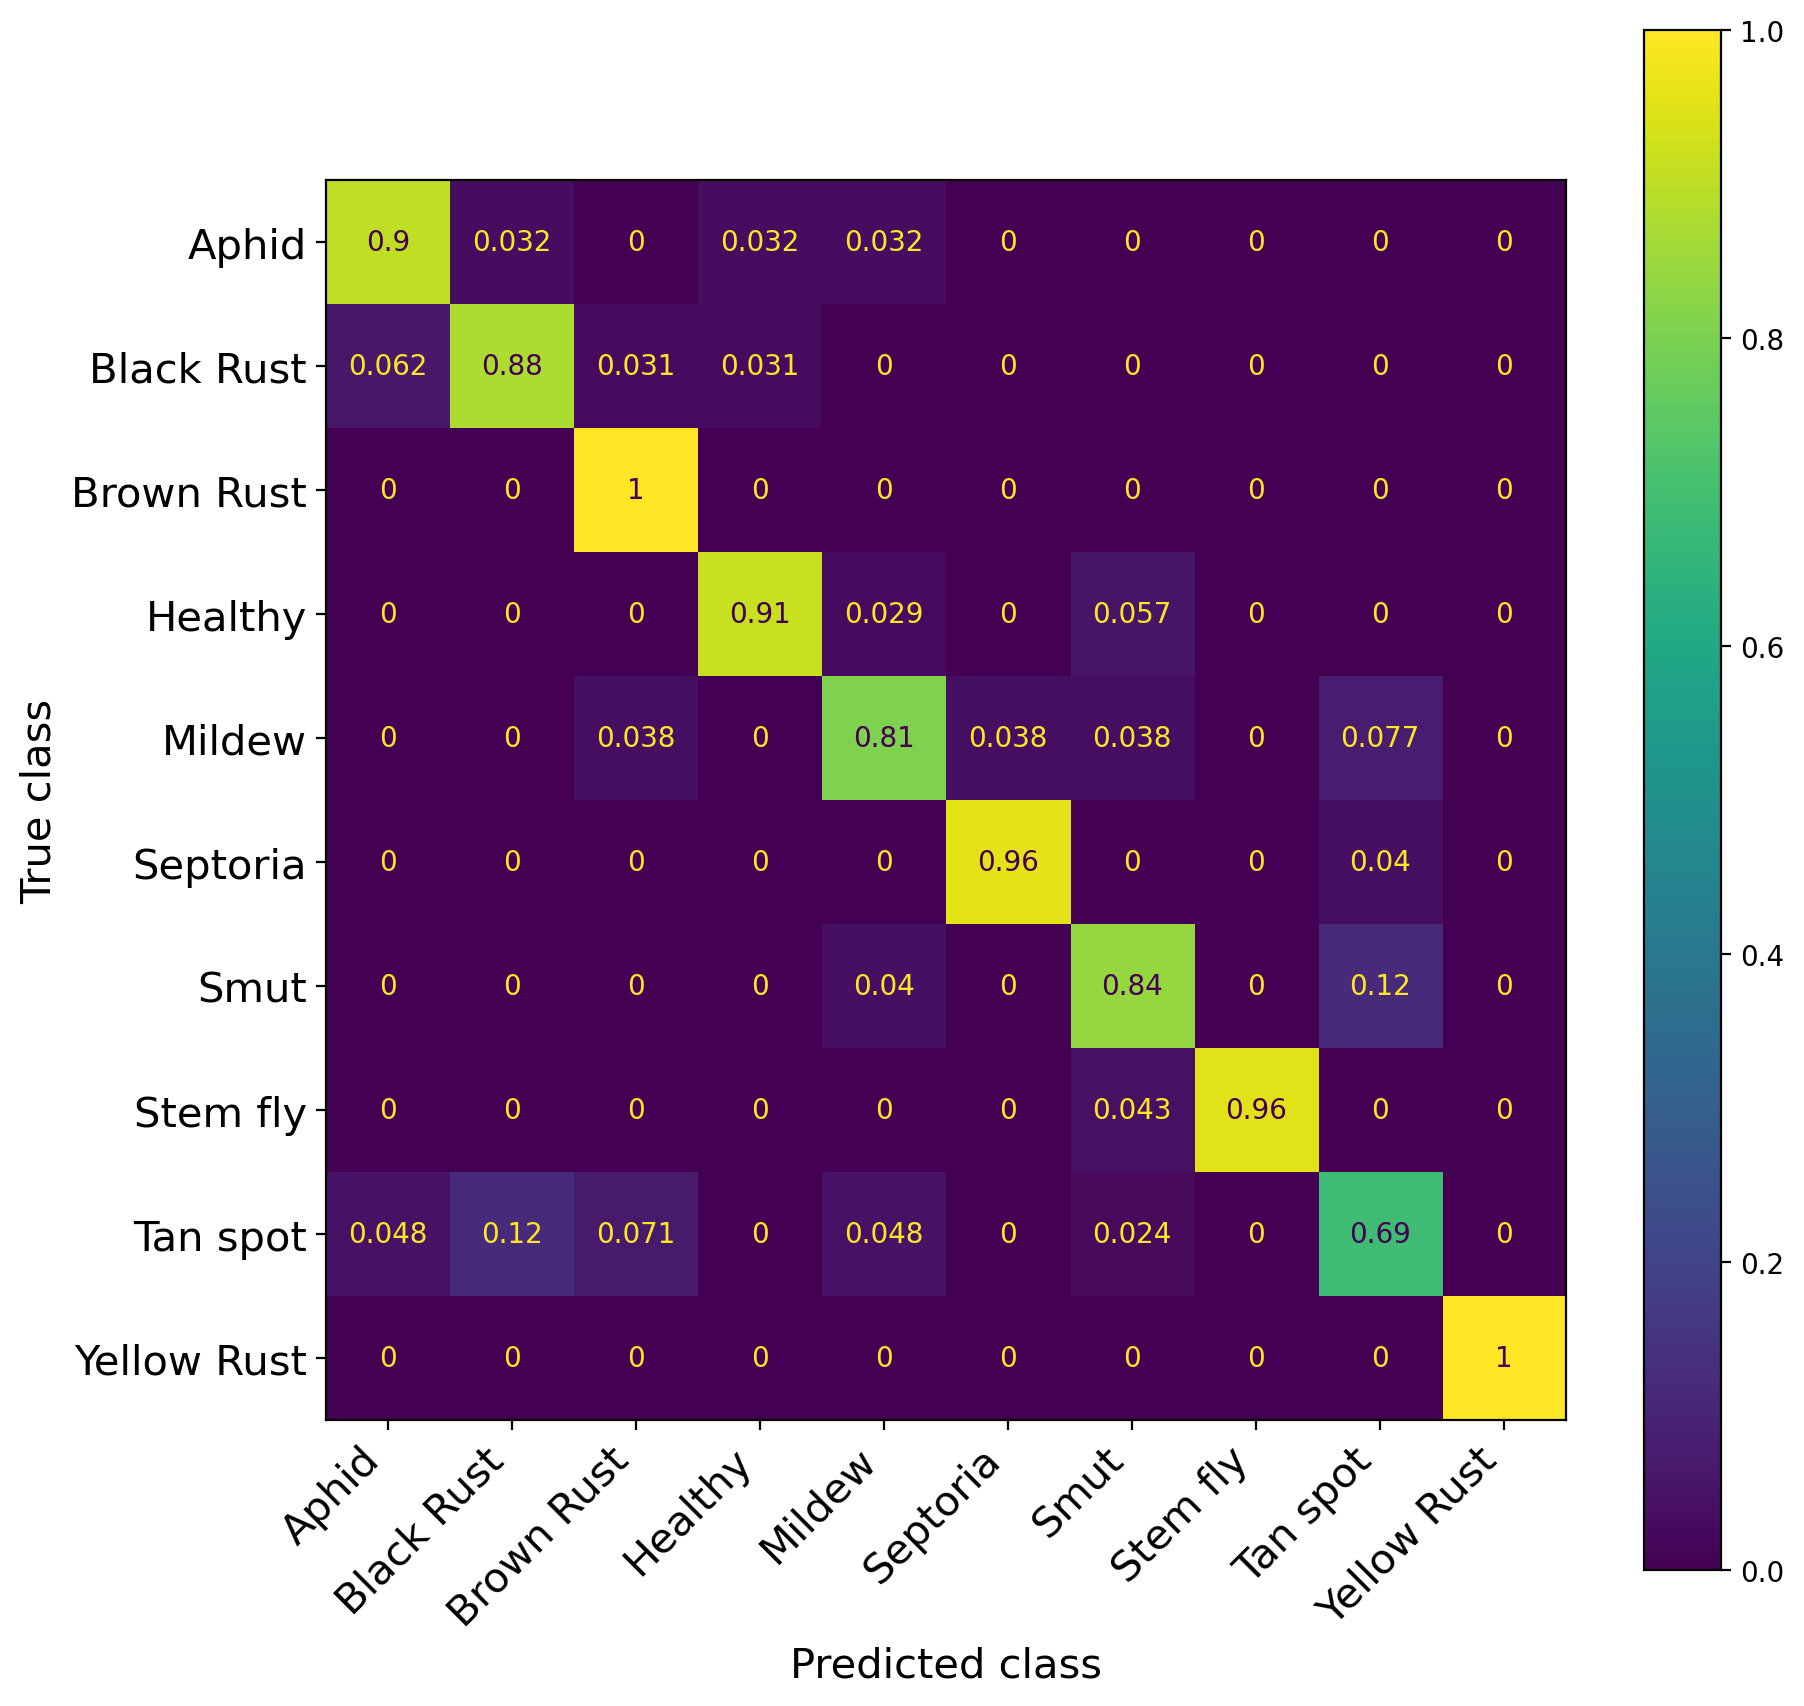

In [22]:
disp = ConfusionMatrixDisplay(conf_mat,display_labels=datadirs)
disp.plot()
disp.figure_.set_size_inches(10,10)
disp.figure_.set_dpi(200)
disp.ax_.set_xlabel('Predicted class',fontsize=15)
disp.ax_.set_ylabel('True class',fontsize=15)
disp.ax_.set_xticklabels(datadirs,rotation=45, ha='right',fontsize=15)
disp.ax_.set_yticklabels(datadirs, ha='right',fontsize=15)

## Comparative Analysis

[Compare the performance of your model(s) against the baseline model. Discuss any improvements or setbacks and the reasons behind them.]


In [23]:
# Comparative Analysis code (if applicable)
# Example: comparing accuracy of the baseline model and the new model
# print(f"Baseline Model Accuracy: {baseline_accuracy}, New Model Accuracy: {new_model_accuracy}")
